In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import random
from utile import *

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
column_names = dataset.columns.tolist()
print(column_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [4]:
#Looking at the main statistics
print(dataset.describe())
stats_df = dataset.describe()
stats_df.loc['skewness'] = dataset.skew()
stats_df.loc['kurtosis'] = dataset.kurt()
stats_df.loc['median'] = dataset.median()
print(stats_df)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
#Load and print the first 20 observations of the dataset.
head_20 = dataset.head(20)
print(head_20)

In [ ]:
#Checking the type of the data
datatype = dataset.dtypes
print(datatype)

In [5]:
print(dataset.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
#Histograms
dataset.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [ ]:
ax = dataset.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
# We hide the axes' labels to make the plot neater and more compact
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

In [ ]:
fig,ax = plt.subplots()
sns.countplot(x=dataset.Class,ax=ax)
for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x() + p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() #y-position
        ax.annotate(val,(x,y))

In [8]:
from datetime import datetime, timedelta

# extract hour from the timestamp column to create an time_hour column
dataset['Time'] = pd.to_datetime(dataset['Time'], unit="s")

In [13]:
dataset['Time'].head()

0   1970-01-01 00:00:00
1   1970-01-01 00:00:00
2   1970-01-01 00:00:01
3   1970-01-01 00:00:01
4   1970-01-01 00:00:02
Name: Time, dtype: datetime64[ns]

In [9]:
dataset['Time'].tail()

284802   1970-01-02 23:59:46
284803   1970-01-02 23:59:47
284804   1970-01-02 23:59:48
284805   1970-01-02 23:59:48
284806   1970-01-02 23:59:52
Name: Time, dtype: datetime64[ns]

In [10]:
dataset["Hour"] = dataset['Time'].dt.hour

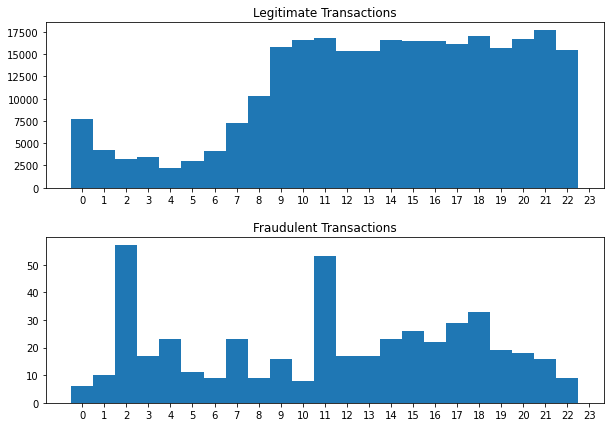

In [11]:
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
dataset.loc[dataset["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
dataset.loc[dataset["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

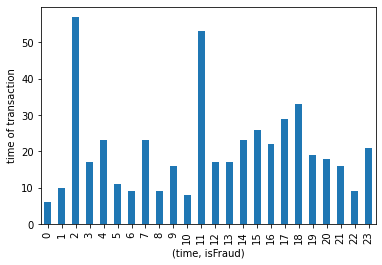

In [12]:
fraud = dataset['Class'].isin([1])

fraud_time = dataset[fraud].groupby(['Hour']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split


trainDF, testDF = train_test_split(dataset, test_size=0.2, random_state=1234, stratify=dataset[["Class"]])

trainDF_norm = trainDF.copy()
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())

testDF_norm = testDF.copy()

testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())

trainDF = trainDF_norm
testDF = testDF_norm
tr_value_counts = trainDF["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the training set." % (tr_value_counts[1] * 100 / len(trainDF)))
tst_value_counts = testDF["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (tst_value_counts[1] * 100 / len(testDF)))

Fraudulent transactions are 0.17% of the training set.
Fraudulent transactions are 0.17% of the test set.


In [15]:
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())

testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())
trainDF = trainDF_normtestDF = testDF_norm

In [16]:
trainDF = trainDF.drop(["Time"], axis=1)
testDF = testDF.drop(["Time"], axis=1)

In [17]:
X_train = trainDF.iloc[:, trainDF.columns != "Class"]
y_train = trainDF.iloc[:, trainDF.columns == "Class"]
X_test = testDF.iloc[:, testDF.columns != "Class"]
y_test = testDF.iloc[:, testDF.columns == "Class"]
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
38607,-0.881164,-0.537194,2.479497,0.944675,-1.578208,1.136568,-0.043735,0.397746,-1.460387,0.527312,...,0.052055,0.355153,0.327118,0.183838,0.044737,0.022493,0.109542,0.109897,136.782587,-4.017257
113302,-0.885404,0.403891,0.730598,-1.655171,2.732323,3.410628,0.233018,0.713919,-0.353257,-0.455123,...,-0.258158,-0.904623,-0.220187,0.984244,0.270677,-0.002165,-0.295257,-0.141850,-68.747413,5.982743
154210,1.936180,-0.559750,0.134698,0.385497,-0.871716,0.106497,-1.156510,0.186510,2.570330,-0.202706,...,-0.087873,0.067471,0.291651,-0.454241,-0.656385,0.451330,-0.047002,-0.059189,-73.797413,-10.017257
183158,1.936207,-0.254931,-1.408383,-0.009918,0.820452,0.921576,-0.157472,0.265727,0.294221,0.105333,...,-0.196572,-0.352925,0.331705,-1.627373,-0.453666,0.309517,-0.024677,-0.086909,-86.767413,-4.017257
212422,0.207577,0.305463,0.638783,-0.459451,0.024812,0.043566,0.370522,-0.286907,-1.699743,1.237403,...,0.099169,0.402490,-0.207907,0.786499,-0.304110,0.085865,-0.152691,-0.097177,-73.747413,-0.017257


In [18]:
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote["Class"].value_counts()

## Model Development

## XGBOOST Model

In [19]:
rows = random.sample(np.arange(0,len(X_train_smote.index)).tolist(), 5000)
model_params = xgboost_search(X_train_smote.iloc[rows,], y_train_smote.iloc[rows,])

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best estimator: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='auc', gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=100, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
Parameters:  {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 100, 'subsample': 1.0}
Highest AUC: 1.00


In [20]:
import xgboost

m2_xgb = xgboost.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 3, seed=1729).set_params(**model_params)

In [21]:
m2_xgb.fit(X_train_smote, y_train_smote, eval_metric="auc", verbose = False, eval_set=[(X_test, y_test)])

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=100, missing=nan, monotone_constraints='()',
              n_estimators=110, n_jobs=8, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=1729, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=1729, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [22]:
y_predicted_xgb = m2_xgb.predict(X_test)

In [23]:
from sklearn.metrics import classification_report


print("Classification Report:\n\n", classification_report(y_test, y_predicted_xgb))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      1.00      0.60        98

    accuracy                           1.00     56962
   macro avg       0.71      1.00      0.80     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


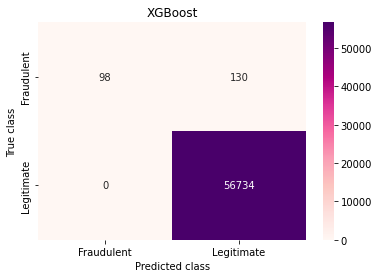

 The result is telling us that we have:  56832 correct predictions
 We have:  130 incorrect predictions
 And a total predictions of:  56962


In [24]:
confusionMatrix(y_predicted_xgb, y_test, "XGBoost")

In [ ]:
plot_roc_curve(m2_xgb, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()